# Google Data Analytics Capstone - Case Study 1
* Author: Wenny
* Date: 2021/11/05

## Import essential libs

In [2]:
import pandas as pd 
import numpy as np

In [3]:
STORAGE_PATH = "/home/nfs_home/mammoth/GoogleAnalyticCerts" ## Path to all the historical data

## Prepare
### Guiding questions

#### How is the data organized?

In [14]:
df_202004 = pd.read_csv(f"{STORAGE_PATH}/202004-divvy-tripdata.csv")
df_202004.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [16]:
df_202104 = pd.read_csv(f"{STORAGE_PATH}/202104-divvy-tripdata.csv")
df_202104.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [8]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

#### How did you verify the data’s integrity?

In [19]:
import os 
CSV_Files = [File for File in os.listdir(STORAGE_PATH) if File[-4:]==".csv"]
Dataset   = [pd.read_csv(File) for File in CSV_Files] ## Loading all historical data, beware of the memory usage.

In [29]:
for data,columns in zip(CSV_Files,Columns):
    print(data,columns)

202004-divvy-tripdata.csv Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
202005-divvy-tripdata.csv Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
202006-divvy-tripdata.csv Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
202007-divvy-tripdata.csv Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_stat

### Are there any problems with the data?

In [36]:
Dataset[0].isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name    False
start_station_id      False
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

In [47]:
# Missing value
for name,data in zip(CSV_Files,Dataset):
    if data.isnull().values.any():
        print(f"Null value detected in {name}.")
print(Dataset[0].loc[Dataset[0].isna().any(axis=1)])

Null value detected in 202004-divvy-tripdata.csv.
Null value detected in 202005-divvy-tripdata.csv.
Null value detected in 202006-divvy-tripdata.csv.
Null value detected in 202007-divvy-tripdata.csv.
Null value detected in 202008-divvy-tripdata.csv.
Null value detected in 202009-divvy-tripdata.csv.
Null value detected in 202101-divvy-tripdata.csv.
Null value detected in 202102-divvy-tripdata.csv.
Null value detected in 202103-divvy-tripdata.csv.
Null value detected in 202104-divvy-tripdata.csv.
Null value detected in 202105-divvy-tripdata.csv.
Null value detected in 202106-divvy-tripdata.csv.
Null value detected in 202107-divvy-tripdata.csv.
Null value detected in 202108-divvy-tripdata.csv.
Null value detected in 202109-divvy-tripdata.csv.
Null value detected in 202110-divvy-tripdata.csv.
Null value detected in 202011-divvy-tripdata.csv.
Null value detected in 202012-divvy-tripdata.csv.
Null value detected in 202010-divvy-tripdata.csv.
Null value detected in Divvy_Trips_2015_Q4.csv.
Nu

In [50]:
# Proportion of members and casual users
print("Porportions of member, casual, and others:")
for name,data in zip(CSV_Files,Dataset):
    if 'member_casual' not in data.columns:
        print(f"{name} does not have \"member_casual\" column!")
        continue
    num_member = len(data[data['member_casual']=="member"])
    num_casual = len(data[data['member_casual']=="casual"])
    num_others = len(data[(data['member_casual']!="member")&(data['member_casual']!="casual")])
    num_total  = len(data)
    print(f"{name}: {num_member/num_total}/{num_casual/num_total}/{num_others/num_total}")
    

Porportions of member, casual, and others:
202004-divvy-tripdata.csv: 0.7212890440690761/0.2787109559309238/0.0
202005-divvy-tripdata.csv: 0.5660495121683294/0.4339504878316706/0.0
202006-divvy-tripdata.csv: 0.5489336890132797/0.4510663109867203/0.0
202007-divvy-tripdata.csv: 0.5116849205773555/0.4883150794226445/0.0
202008-divvy-tripdata.csv: 0.5345771987640614/0.46542280123593865/0.0
202009-divvy-tripdata.csv: 0.5671478803207758/0.43285211967922427/0.0
202101-divvy-tripdata.csv: 0.8129066237065493/0.18709337629345066/0.0
202102-divvy-tripdata.csv: 0.795836524122365/0.20416347587763492/0.0
202103-divvy-tripdata.csv: 0.6322342623065612/0.36776573769343884/0.0
202104-divvy-tripdata.csv: 0.5949322420899683/0.40506775791003174/0.0
202105-divvy-tripdata.csv: 0.5167418124909477/0.4832581875090523/0.0
202106-divvy-tripdata.csv: 0.49193593706097216/0.5080640629390278/0.0
202107-divvy-tripdata.csv: 0.46248708065320215/0.5375129193467978/0.0
202108-divvy-tripdata.csv: 0.48695222986950987/0.5130

## Process

### Guiding questions

#### Have you ensured your data’s integrity?

In [108]:
# Integrate all Trips files and station files separately
Trips_Files     = [File for File in os.listdir(STORAGE_PATH) if not "Stations" in File and File[-4:]==".csv"]
Station_Files   = [File for File in os.listdir(STORAGE_PATH) if "Stations" in File and File[-4:]==".csv"]
Trips_Dataset   = [pd.read_csv(File) for File in Trips_Files]
Station_Dataset = [pd.read_csv(File) for File in Station_Files]

/home/nfs_home/wenny/anaconda3/envs/HiCPaw/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [161]:
# Rename columns in Divvy_Trips_2018_Q1.csv
for data in Trips_Dataset:
    data.rename(columns={"01 - Rental Details Rental ID":"trip_id",
                         "01 - Rental Details Local Start Time":"start_time",
                         "01 - Rental Details Local End Time":"end_time",
                         "01 - Rental Details Bike ID":"bikeid",
                         "01 - Rental Details Duration In Seconds Uncapped":"tripduration",
                         "03 - Rental Start Station ID":"from_station_id",
                         "03 - Rental Start Station Name":"from_station_name",
                         "02 - Rental End Station ID":"to_station_id",
                         "02 - Rental End Station Name":"to_station_name",
                         "User Type":"usertype",
                         "Member Gender":"gender",
                         "05 - Member Details Member Birthday Year":"birthyear"},inplace=True)

In [270]:
# Integrate the entire trips dataset:
## Columns with ID were removed
## tripduration = ended_at - started_at (if missing)
## usertype = df['member_casual]=='member'?'subscriber':'customer' (if missing)
## Season, Weekday, Start_hour 
from datetime import datetime
from tqdm import tqdm

def get_duration_sec(t1, t2):
    t1 = datetime.strptime(t1, "%Y-%m-%d %H:%M:%S")
    t2 = datetime.strptime(t2, "%Y-%m-%d %H:%M:%S")
    return int((t2 - t1).seconds)

Integrated_dataset = []
for df in tqdm(Trips_Dataset):
    if not "usertype" in df.columns:
        df.rename(columns={'member_casual':'usertype'},inplace=True)
        df['usertype'].replace({'member':'Subscriber','casual':'Customer'},inplace=True)
    if "starttime" in df.columns:
        df.rename(columns={'starttime':'start_time'},inplace=True)
        df.rename(columns={'stoptime':'end_time'},inplace=True)
    if "started_at" in df.columns:
        df.rename(columns={'started_at':'start_time'},inplace=True)
        df.rename(columns={'ended_at':'end_time'},inplace=True)
    if not "tripduration" in df.columns:
        df['tripduration'] = df[['start_time','end_time']].apply(lambda x:get_duration_sec(*x),axis=1)
    df['tripduration'] = [float(val.replace(',','')) if type(val)==str else val for val in df['tripduration'].values]
    
    season     = []
    weekday    = []
    start_hour = []
    
    for date in df['start_time']:
        if "/" in date: # 4/30/2016 23:59
            try:
                time = datetime.strptime(date, "%m/%d/%Y %H:%M:%S")
            except:
                time = datetime.strptime(date, "%m/%d/%Y %H:%M")
        else:
            try: # 2020-03-07 15:25:55
                time = datetime.strptime(date, "%Y-%m-%d %H:%M:%S") 
            except: # 2020-03-07 15:25
                time = datetime.strptime(date, "%Y-%m-%d %H:%M")                
        season.append(time.month /4)
        weekday.append(time.strftime('%A'))
        start_hour.append(time.hour)
    df["season"]      = season
    df["weekday"]     = weekday
    df["start_hour"]  = start_hour

    Integrated_dataset.append(df[["start_time","end_time","tripduration","season","weekday","start_hour","usertype"]])



100%|██████████| 49/49 [07:57<00:00,  9.75s/it]


In [272]:
Integrated_dataset = pd.concat(Integrated_dataset)

In [273]:
# Remove usertype "Dependent", which the meaning is not described.
Integrated_dataset = Integrated_dataset[~(Integrated_dataset["usertype"]=="Dependent")]

#### How can you verify that your data is clean and ready to analyze? 

In [274]:
# No Nans
Integrated_dataset.isna().any()

start_time      False
end_time        False
tripduration    False
season          False
weekday         False
start_hour      False
usertype        False
dtype: bool

In [275]:
#dtype of tripduration is float64
Integrated_dataset.dtypes

start_time       object
end_time         object
tripduration    float64
season          float64
weekday          object
start_hour        int64
usertype         object
dtype: object

In [276]:
#"usertype" now containes only two possible values
Integrated_dataset['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

### Analyze
#### What surprises did you discover in the data?

In [288]:
Integrated_dataset.head(10)

,start_time,end_time,tripduration,season,weekday,start_hour,usertype
0,4/30/2016 23:59,5/1/2016 0:11,733.0,1.0,Saturday,23,Subscriber
1,4/30/2016 23:58,5/1/2016 0:07,556.0,1.0,Saturday,23,Subscriber
2,4/30/2016 23:58,5/1/2016 0:02,253.0,1.0,Saturday,23,Subscriber
3,4/30/2016 23:54,5/1/2016 0:08,802.0,1.0,Saturday,23,Subscriber
4,4/30/2016 23:52,5/1/2016 0:11,1146.0,1.0,Saturday,23,Customer
5,4/30/2016 23:49,5/1/2016 0:11,1291.0,1.0,Saturday,23,Customer
6,4/30/2016 23:46,4/30/2016 23:54,451.0,1.0,Saturday,23,Subscriber
7,4/30/2016 23:45,5/1/2016 0:18,1954.0,1.0,Saturday,23,Subscriber
8,4/30/2016 23:38,4/30/2016 23:42,226.0,1.0,Saturday,23,Subscriber
9,4/30/2016 23:37,4/30/2016 23:53,954.0,1.0,Saturday,23,Subscriber


In [277]:
# As a whole
import matplotlib.pyplot as plt
Subscribers = Integrated_dataset[Integrated_dataset['usertype']=="Subscriber"]
Customers   = Integrated_dataset[Integrated_dataset['usertype']=="Customer"]

In [278]:
Subscribers.describe()

,tripduration,season,start_hour
count,2.072246e+07,2.072246e+07,2.072246e+07
mean,8.222142e+02,1.781569e+00,1.368853e+01
std,9.585859e+03,6.805289e-01,4.834647e+00
min,0.000000e+00,2.500000e-01,0.000000e+00
25%,3.580000e+02,1.250000e+00,9.000000e+00
50%,5.870000e+02,1.750000e+00,1.500000e+01
75%,9.570000e+02,2.250000e+00,1.700000e+01
max,1.355760e+07,3.000000e+00,2.300000e+01


In [279]:
Customers.describe()

,tripduration,season,start_hour
count,9.049927e+06,9.049927e+06,9.049927e+06
mean,2.167102e+03,1.813959e+00,1.451765e+01
std,2.644044e+04,4.940827e-01,4.527117e+00
min,0.000000e+00,2.500000e-01,0.000000e+00
25%,7.580000e+02,1.500000e+00,1.200000e+01
50%,1.282000e+03,1.750000e+00,1.500000e+01
75%,2.039000e+03,2.250000e+00,1.800000e+01
max,1.433640e+07,3.000000e+00,2.300000e+01


Text(0.5, 1.0, 'Box plot for trip duration between different usertypes')

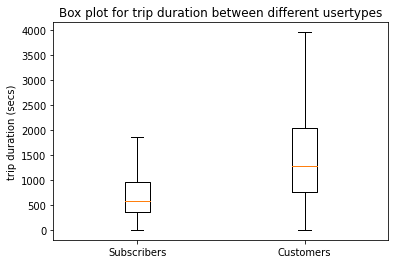

In [280]:
plt.boxplot([Subscribers['tripduration'].values,Customers['tripduration'].values], showfliers=False)
plt.xticks([1,2],['Subscribers','Customers'])
plt.ylabel("trip duration (secs)")
plt.title("Box plot for trip duration between different usertypes")

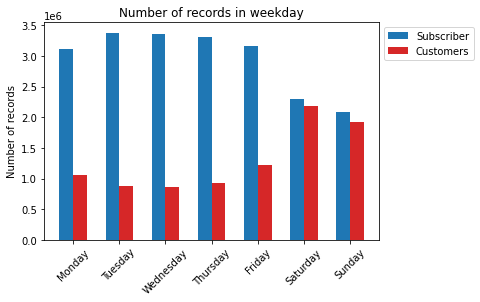

In [286]:
# In the view of 7 days of a week:
Weekday = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
Sub_Weekday_cnt = [len(Subscribers[Subscribers['weekday']==Day]) for Day in Weekday]
Cus_Weekday_cnt = [len(Customers[Customers['weekday']==Day]) for Day in Weekday]

x = np.arange(len(Weekday))
width = 0.3
plt.bar(x, Sub_Weekday_cnt, width, color='tab:blue', label='Subscriber')
plt.bar(x + width, Cus_Weekday_cnt, width, color='tab:red', label='Customers')
plt.xticks(x + width / 2, Weekday,rotation=45)
plt.ylabel('Number of records')
plt.title('Number of records in weekday')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

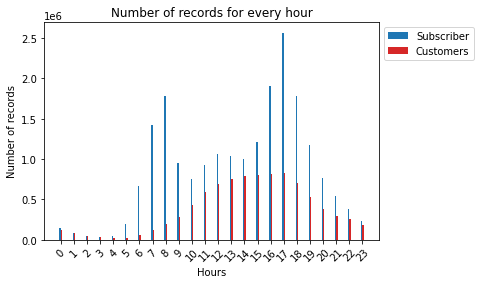

In [295]:
# In the view of 7 days of a week:
Hours = list(range(0,24))
Sub_Hour_cnt = [len(Subscribers[Subscribers['start_hour']==Hour]) for Hour in Hours]
Cus_Hour_cnt = [len(Customers[Customers['start_hour']==Hour]) for Hour in Hours]

x = np.arange(len(Hours))
width = 0.1
plt.bar(x, Sub_Hour_cnt, width, color='tab:blue', label='Subscriber')
plt.bar(x + width, Cus_Hour_cnt, width, color='tab:red', label='Customers')
plt.xticks(x + width / 2, Hours, rotation=45)
plt.xlabel('Hours')
plt.ylabel('Number of records')
plt.title('Number of records for every hour')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()